## Sales Analysis

#### importing necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os

### Data Cleaning 

#### merging 12 months of sales data into a single file

In [2]:
df = pd.read_csv('Sales_Data/Sales_January_2019.csv')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [3]:
df = pd.read_csv('Sales_Data/Sales_January_2019.csv')

files = [file for file in os.listdir('Sales_Data/')]
all_months_data = pd.DataFrame()
for file in files:
    df = pd.read_csv('Sales_Data/' + file)
    all_months_data = pd.concat([all_months_data, df])
all_months_data.to_csv('all_data.csv', index = False)


#### read in updated DataFrame

In [4]:
all_data = pd.read_csv('all_data.csv')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


#### cleaing up the data

##### droping the NAN rows

In [5]:
nan_values = all_data[all_data.isna().any(axis =1)]
nan_values.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
all_data = all_data.dropna(how = 'any')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


##### ValueError: invalid literal for int() with base 10: 'Or'
##### Finding this error 'Or' and deleting it

In [7]:
temp = all_data[all_data['Order Date'].str[0:2] == 'Or']
temp.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [8]:
# by excluding the above rows, now we get the proper dataset
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']

##### Converting columns to the correct type

In [10]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered']) #make int
all_data['Price Each'] = pd.to_numeric(all_data['Price Each']) # make float

##### augment data with additional columns

##### adding month column

In [11]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


##### adding Sales column

In [12]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


##### adding City column

In [13]:
# lets use .apply method

all_data['City'] = all_data['Purchase Address'].apply(lambda x : x.split(',')[1] + ' (' + x.split(',')[2].split(' ')[1] + ')')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


##### converting order date into a datetime object 

In [20]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

C:\Users\bisht\AppData\Local\Temp\ipykernel_8076\3842191188.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])


In [31]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


# Exploratory Data Analysis

## Task1 --> Best month for sales and how much was eraned that month?

In [107]:
month_sales = all_data.groupby('Month').sum('Sales')[['Sales', 'Quantity Ordered']]

Text(0.5, 0, 'Months Number')

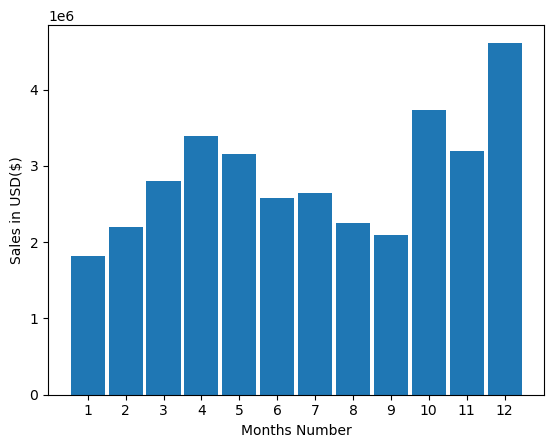

In [15]:
months = range(1,13)

plt.bar(months , month_sales['Sales'], 0.9)
plt.xticks(months)
plt.ylabel('Sales in USD($)')
plt.xlabel('Months Number')

In [108]:
# December is the best month for sales in the USA, with total earnings of 4.5M+ USD. 
# This increase is probably the result of year-end bonuses, big discounts, 
# Christmas shopping, and the joyous atmosphere that leads to more spending.

## Task2 --> Which city had the highest number of sales

In [16]:
City_sales = all_data.groupby('City').sum()[['Sales', 'Quantity Ordered']]
City_sales

,Sales,Quantity Ordered
City,,
Atlanta (GA),2795498.58,16602
Austin (TX),1819581.75,11153
Boston (MA),3661642.01,22528
Dallas (TX),2767975.40,16730
Los Angeles (CA),5452570.80,33289
New York City (NY),4664317.43,27932
Portland (ME),449758.27,2750
Portland (OR),1870732.34,11303
San Francisco (CA),8262203.91,50239


Text(0.5, 0, 'City Name')

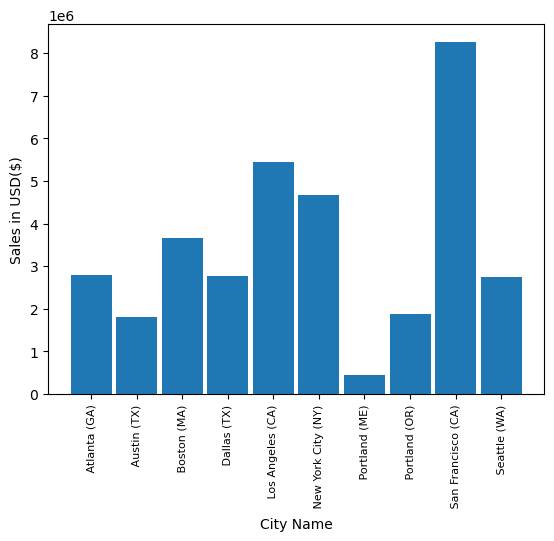

In [17]:
Cities = [city for city, df in all_data.groupby('City')]

plt.bar(Cities , City_sales['Sales'], 0.9)
plt.xticks(Cities, rotation = 'vertical', size = 8)
plt.ylabel('Sales in USD($)')
plt.xlabel('City Name')

In [109]:
# San Francisco (CA) is the city had the highest number of sales with 8M+ USD sales.

## Task3 --> What time should we display ads to maximize likelihood of customer's buying products

In [22]:
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


Text(0, 0.5, 'Number of Orders')

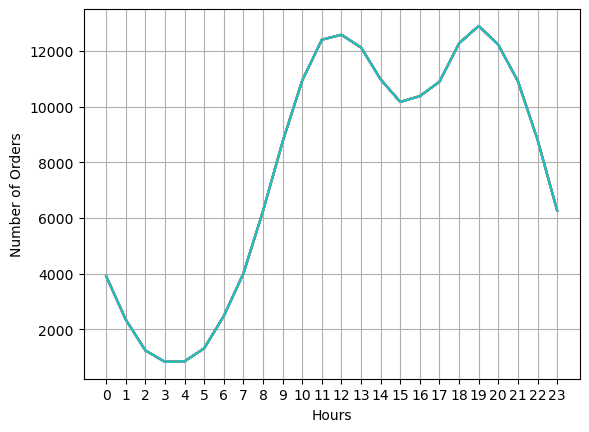

In [28]:
hours = [hour for hour, df in all_data.groupby('Hour')]

plt.plot(hours, all_data.groupby(['Hour']).count())
plt.xticks(hours)
plt.grid()
plt.xlabel('Hours')
plt.ylabel('Number of Orders')

In [110]:
# To increase the likelihood of customers purchasing products, we should show advertisements
# between 11 AM and 1 PM and between 6 PM and 8 PM,as these times have the highest sales over the past year.

## Task4 --> What products are most often sold together?

In [32]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


In [47]:
Orders_sold_together = all_data[all_data['Order ID'].duplicated(keep=False)]

Orders_sold_together['Grouped'] = Orders_sold_together.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
Orders_sold_together = Orders_sold_together[['Order ID', 'Grouped']].drop_duplicates()

Orders_sold_together.head()

C:\Users\bisht\AppData\Local\Temp\ipykernel_8076\655697378.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Orders_sold_together['Grouped'] = Orders_sold_together.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [45]:
# Orders_sold_together[['Order ID', 'Goruped']].value_counts().reset_index(name='count')

from itertools import combinations
from collections import Counter

In [54]:
count = Counter()
for row in Orders_sold_together['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key, value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


In [111]:
# The products that are most frequently sold together over a 1000 times are the IPHONE and the LIGHTNING CHARGING CABLE.

## Task5 --> What product/products sold the most? Why do you think it/they sold the most?

Text(0, 0.5, 'Quantity Orders')

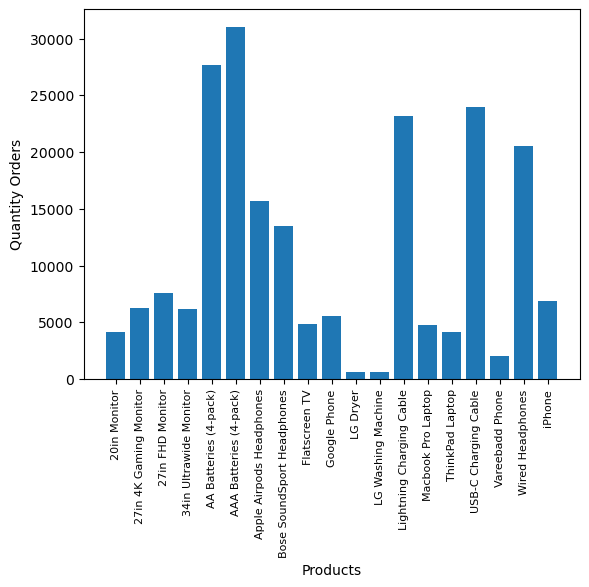

In [84]:
product_group = all_data.groupby('Product')
quantity_ordered = product_group.sum('Quantity Ordered')['Quantity Ordered']

products  = [product for product, df in product_group]

plt.bar(products, quantity_ordered)
plt.xticks(products, rotation = 'vertical', size = 8)
plt.xlabel('Products')
plt.ylabel('Quantity Orders')

C:\Users\bisht\AppData\Local\Temp\ipykernel_8076\123246155.py:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  ax2.plot(products,prices, 'b-', color = 'purple')
C:\Users\bisht\AppData\Local\Temp\ipykernel_8076\123246155.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(products, rotation = 'vertical', size = 8)


Text(0, 0.5, 'Price')

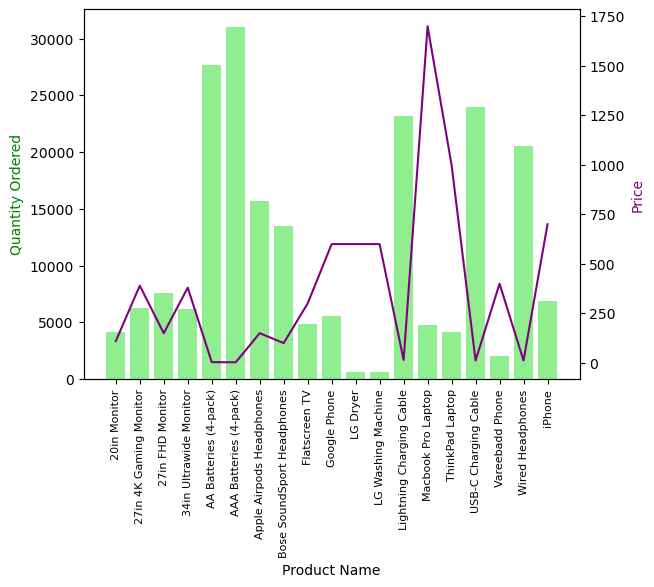

In [100]:
prices = all_data.groupby('Product').mean('Price Each')['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

ax1.bar(products,quantity_ordered, color = 'lightgreen')
ax2.plot(products,prices, 'b-', color = 'purple')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered' , color = 'green')
ax1.set_xticklabels(products, rotation = 'vertical', size = 8)
ax2.set_ylabel('Price', color = 'purple')

In [ ]:
# The products that sold the most were "AAA Batteries, AA Batteries, USB-C charging cables,
# and Lightning charging cables." These items are likely top sellers due to their low cost, high demand,
# and essential nature,making them frequent purchases for many electronic devices.